In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('cluster.csv',index_col=0)
df_copy = df.copy()
display(df.head())
print(df.shape)

,Market Cap,Enterprise Value,Assets,Inventory,Free Cash Flow,Financing,Gross Margin,Beta
ARCO,1649.095168,2905.213696,2361.257,37.800,143.045,-17.926,0.121829,1.344990
ARKR,74.758992,138.433536,161.216,3.510,7.156,-3.559,0.269917,1.188031
ARMK,9069.895680,16448.302080,14376.164,412.676,249.261,-2005.339,0.132874,1.801579
BBQ,127.068456,194.864848,204.423,3.316,21.032,16.262,0.165867,1.960689
BFI,67.816664,229.292672,317.719,1.387,-18.132,-13.012,0.492753,0.290000


(48, 8)


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from tqdm import tqdm

scaler = MinMaxScaler()
for column in df_copy.columns:
    df_copy[column] = scaler.fit_transform(df_copy[column].values.reshape(-1,1))


SSE = []
Ks = [_ for _ in range(2,22)]

for K in tqdm(Ks):
    model = KMeans(n_clusters=K, random_state=16).fit(df_copy)
    SSE.append(model.inertia_)

100%|██████████| 20/20 [00:00<00:00, 40.53it/s]


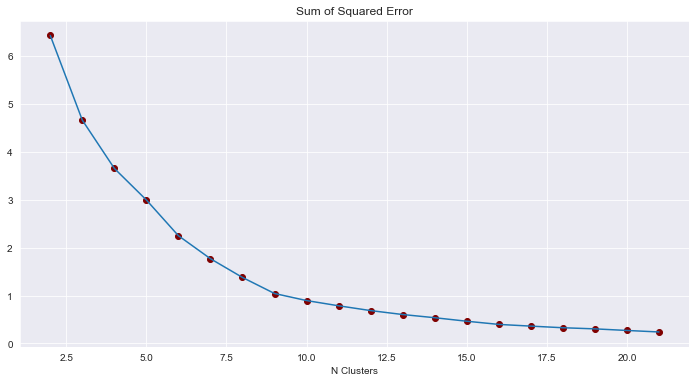

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(Ks,SSE,color='maroon')
plt.plot(Ks,SSE)
plt.title('Sum of Squared Error')
plt.xlabel('N Clusters')
plt.show()

In [15]:
model = KMeans(n_clusters=3,random_state=16).fit(df_copy)
df['Cluster'] = model.labels_

display(df.head())
print(df.shape)

,Market Cap,Enterprise Value,Assets,Inventory,Free Cash Flow,Financing,Gross Margin,Beta,Cluster
ARCO,1649.095168,2905.213696,2361.257,37.800,143.045,-17.926,0.121829,1.344990,0
ARKR,74.758992,138.433536,161.216,3.510,7.156,-3.559,0.269917,1.188031,0
ARMK,9069.895680,16448.302080,14376.164,412.676,249.261,-2005.339,0.132874,1.801579,0
BBQ,127.068456,194.864848,204.423,3.316,21.032,16.262,0.165867,1.960689,0
BFI,67.816664,229.292672,317.719,1.387,-18.132,-13.012,0.492753,0.290000,2


(48, 9)


In [16]:
df.Cluster.value_counts()

0    29
2    17
1     2
Name: Cluster, dtype: int64

In [24]:
df.groupby('Cluster').mean()

,Market Cap,Enterprise Value,Assets,Inventory,Free Cash Flow,Financing,Gross Margin,Beta
Cluster,,,,,,,,
0,3515.307680,4510.240245,2947.722172,64.613793,138.204276,-151.417966,0.198895,1.729852
1,146185.561200,176323.391500,42623.450000,829.750000,5810.300000,-4623.300000,0.415992,0.747035
2,7240.229764,22361.395228,3988.672471,61.247647,304.938118,-172.533353,0.423598,1.149029


In [25]:
df

,Market Cap,Enterprise Value,Assets,Inventory,Free Cash Flow,Financing,Gross Margin,Beta,Cluster
ARCO,1649.095168,2905.213696,2361.257,37.800,143.045,-17.926,0.121829,1.344990,0
ARKR,74.758992,138.433536,161.216,3.510,7.156,-3.559,0.269917,1.188031,0
ARMK,9069.895680,16448.302080,14376.164,412.676,249.261,-2005.339,0.132874,1.801579,0
BBQ,127.068456,194.864848,204.423,3.316,21.032,16.262,0.165867,1.960689,0
BFI,67.816664,229.292672,317.719,1.387,-18.132,-13.012,0.492753,0.290000,2
BH/A,372.036000,59.887364,895.000,4.000,164.000,-156.000,0.390710,1.860000,2
BJRI,548.238208,1043.819136,1035.166,11.579,22.096,-35.254,0.119253,2.026529,0
BLMN,1842.802688,3786.360576,3294.271,79.112,279.625,-317.419,0.179460,2.004928,0
BROS,6875.568128,2520.801024,553.700,23.345,-38.069,27.580,0.304821,1.810087,0
CAKE,1568.421888,3133.768960,2798.125,42.839,146.063,-108.827,0.412079,1.632832,2


In [ ]:
df.to_csv('clusterd.csv')